# ColaboratoryによるGPU環境

## データのダウンロード

以下のコマンドを実行してサンプルプログラムのzipファイル（RL_Book_Colab.zip）をダウンロードできます。

In [1]:
!wget https://www.shoeisha.co.jp/static/book/download/9784798159928/RL_Book_Colab.zip

--2025-02-27 11:48:11--  https://www.shoeisha.co.jp/static/book/download/9784798159928/RL_Book_Colab.zip
Resolving www.shoeisha.co.jp (www.shoeisha.co.jp)... 114.31.94.139
Connecting to www.shoeisha.co.jp (www.shoeisha.co.jp)|114.31.94.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18421143 (18M) [application/zip]
Saving to: ‘RL_Book_Colab.zip’

RL_Book_Colab.zip   100%[===================>]  17.57M  3.75MB/s    in 6.0s    

2025-02-27 11:48:19 (2.91 MB/s) - ‘RL_Book_Colab.zip’ saved [18421143/18421143]



## 使用法

コンテンツの実行は、当該コンテンツのディレクトリに移動してから行ってください。

例1：4-3節のpendulumの学習
```shell
%cd /content/RL_Book_Colab/contents/4-3_ac_pendulum
!python3 train.py
```
予測制御を実行する際は、最初に !xvfb-run -s "-screen 0 1280x720x24" を付与して predict.py を実行してください

例2：4-3節のpendulumの予測制御
```shell
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}
```





## 環境準備

### ライブラリのインストール

In [2]:
!pip uninstall -y --quiet tensorflow
!pip install --quiet tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorstore 0.1.72 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [3]:
!unzip RL_Book_Colab.zip > /dev/null
%cd ./RL_Book_Colab/
!pip install --quiet -r docker/requirements_colab.txt
!git clone https://github.com/benelot/pybullet-gym
%cd pybullet-gym
!pip install --quiet -e .
%cd ..
!apt-get update > /dev/null
!apt-get upgrade > /dev/null
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg > /dev/null

/content/RL_Book_Colab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 

**※ライブラリのインストール時にエラーが出る事がありますが、本書のコードを実行する分には問題ありません。**  

この時点でインストールされているライブラリのバージョンをファイルに書き出しておきます。

In [ ]:
!pip list >> /content/RL_Book_Colab/lib_list_1.txt

### 動画再生用の関数を定義

In [5]:
import io
import base64
from IPython.display import HTML

def play_movie(mp4_path):
  f = io.open(mp4_path, 'r+b')
  video = f.read()
  encoded = base64.b64encode(video)
  f.close()
  return HTML(data='''<video alt="test" controls>
                      <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                      </video>'''.format(encoded.decode('ascii')))

## サンプルコードの実行

### コンテンツ一覧

In [ ]:
%pwd

'/content/RL_Book_Colab'

In [ ]:
%ls contents

2_dp_officeworker/  4-2_dqn_pendulum/  5_walker2d/  6-3_rubiks_cube/  7-2_enas/
3_keras_example/    4-3_ac_pendulum/   6-2_tsp/     7-1_seqgan/       LICENSE.md


## 2章　動的計画法（会社員のMDP）

In [ ]:
%cd /content/RL_Book_Colab/contents/2_dp_officeworker/

/content/RL_Book_Colab/contents/2_dp_officeworker


方策反復法による解法

In [ ]:
!python3 policy_iteration.py

step: 0  value: [13.48232426 13.99837464 12.19829338]  policy: [0.5, 0.5, 0.5]
step: 1  value: [20.24405125 20.         20.23184869]  policy: [1, 0, 1]
step: 2  value: [25.01947209 25.14928602 24.76849849]  policy: [1, 1, 1]


価値反復法による解法

In [ ]:
!python3 value_iteration.py

step: 0  value: [1.2 1.5 1. ]  policy: [1, 1, 1]
step: 1  value: [2.53  2.545 2.14 ]  policy: [1, 1, 1]
step: 2  value: [3.5408  3.71825 3.4035 ]  policy: [1, 1, 1]
step: 3  value: [4.672535  4.7985425 4.36376  ]  policy: [1, 1, 1]
step: 4  value: [5.6760067  5.79224012 5.43890825]  policy: [1, 1, 1]
step: 5  value: [6.63549506 6.7795846  6.39220636]  policy: [1, 1, 1]
step: 6  value: [7.56700351 7.68815818 7.30372031]  policy: [1, 1, 1]
step: 7  value: [8.43070707 8.56359381 8.18865333]  policy: [1, 1, 1]
step: 8  value: [9.26417543 9.39419619 9.00917172]  policy: [1, 1, 1]
step: 9  value: [10.05133173 10.1798399   9.80096666]  policy: [1, 1, 1]
step: 10  value: [10.79886199 10.92984174 10.54876515]  policy: [1, 1, 1]
step: 11  value: [11.5109451  11.64012289 11.25891889]  policy: [1, 1, 1]
step: 12  value: [12.18568798 12.31568539 11.93539784]  policy: [1, 1, 1]
step: 13  value: [12.82764649 12.95751577 12.57640358]  policy: [1, 1, 1]
step: 14  value: [13.43722866 13.56692378 13.1862

## 3章　深層学習（画像分類、文書分類）

In [ ]:
%cd /content/RL_Book_Colab/contents/3_keras_example

/content/RL_Book_Colab/contents/3_keras_example


### 3.1節　多層パーセプトロン

ニューラルネットワークの学習

In [ ]:
!python3 simple_mnist_dense.py

2024-12-07 07:57:01.834994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 07:57:01.835058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 07:57:01.836447: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 07:57:01.843890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-07 07:57:02.845146: W tensorflow/compiler/tf2

学習済みネットワークによる予測  
**※MNISTの文字画像が上手く表示されないときは、下記コマンドセルを再実行してください。**

313/313 [==============================] - 0s 1ms/step
入力画像:


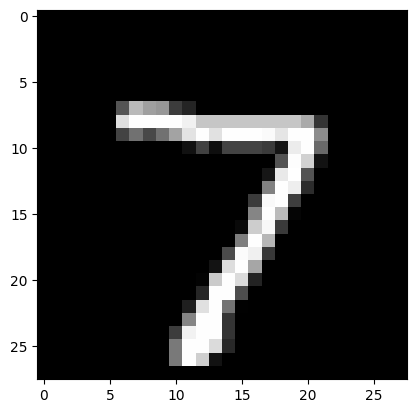

予測結果: 7


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from IPython.display import Image, display
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.resetwarnings()
warnings.simplefilter('ignore')

num_classes = 10

(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test, num_classes)

model = load_model("simple_mnist_dense_weight.h5")

pred = model.predict(x_test)


print('入力画像:')
imshow(x_test[0], 'gray')
plt.show()
print("予測結果: {}".format(np.argmax(pred[0])))

### 3.2節　畳み込み二ューラルネットワーク（CNN）

CNNの学習

In [ ]:
!python3 simple_mnist_cnn.py

2024-12-07 07:59:15.792114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 07:59:15.792176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 07:59:15.793802: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 07:59:16.820782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-07 07:59:18.943971: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "sequential"
_____

学習済みCNNによる予測  
**※MNISTの文字画像が上手く表示されないときは、下記コマンドセルを再実行してください。**

313/313 [==============================] - 1s 2ms/step
入力画像:


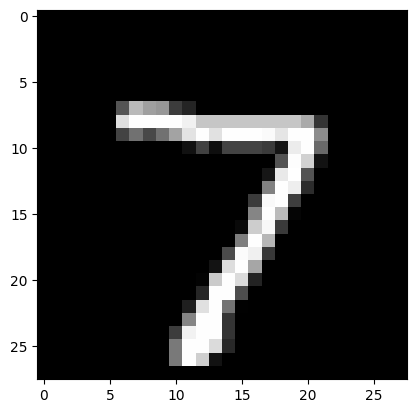

予測結果: 7


In [ ]:
model = load_model("simple_mnist_cnn_weight.h5")
pred = model.predict(x_test.reshape(-1, 28, 28, 1))

print('入力画像:')
imshow(x_test[0], 'gray')

plt.show()
print("予測結果: {}".format(np.argmax(pred[0])))

### 3.3節　再帰型ニューラルネットワーク（RNN）

#### データの確認

In [ ]:
!cat "movie_comment_sample.csv"

movie_comment,is_train
"感動 した 映画",1
"号泣 した 映画",1
"つまらない",0
"楽しく ない 映画",0
"楽しい 映画",1
"面白く ない 映画",0
"つまらない 映画",0

#### SimpleRNNの学習と予測

SimpleRNNの学習

In [ ]:
!python3 simple_rnn.py

2024-12-07 08:01:07.996650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:01:07.996702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:01:07.997895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:01:09.369387: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-07 08:01:11.800578: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "sequential"
_____

予測のための関数定義

In [ ]:
import csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10
max_length = 4

def load_movie_comment_data():
    docs = csv.reader(open("movie_comment_sample.csv"))
    next(docs, None)
    docs = list(docs)
    texts = [d[0] for d in docs]
    labels = [int(d[1]) for d in docs]
    return texts, labels

def preprocessing(texts, labels):
    tokenizer = Tokenizer(vocab_size)
    tokenizer.fit_on_texts(texts)
    encoded_docs = tokenizer.texts_to_sequences(texts)
    padded_docs = pad_sequences(
        encoded_docs, maxlen=max_length, padding='post')

    train_padded_docs = padded_docs[:6]
    test_padded_docs = padded_docs[6:7]

    train_labels = labels[:6]
    test_labels = labels[6:7]
    return train_padded_docs, test_padded_docs, train_labels, test_labels

学習済みSimpleRNNによるポジネガ予測

In [ ]:
import warnings

warnings.simplefilter('ignore')

texts, labels = load_movie_comment_data()
train_padded_docs, test_padded_docs, train_labels, test_labels = preprocessing(texts, labels)
model = load_model("simple_rnn_weight.h5")
preds = np.round(model.predict(test_padded_docs))

print('入力文: {}'.format(texts[6]))
print('id列に変換: {}'.format(test_padded_docs))

if preds == 0:
    print("予測結果: ネガティブ")
else:
    print("予測結果: ポジティブ")

1/1 [==============================] - 1s 1s/step
入力文: つまらない 映画
id列に変換: [[3 1 0 0]]
予測結果: ポジティブ


#### LSTMの学習と予測

LSTMの学習

In [ ]:
!python3 simple_lstm.py

2024-12-07 08:03:01.684649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:03:01.684700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:03:01.685876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:03:02.663444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-07 08:03:04.478322: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "sequential"
_____

学習済みLSTMによるポジネガ予測

In [ ]:
import warnings

warnings.simplefilter('ignore')

texts, labels = load_movie_comment_data()
train_padded_docs, test_padded_docs, train_labels, test_labels = preprocessing(texts, labels)
model = load_model("simple_lstm_weight.h5")
preds = np.round(model.predict(test_padded_docs))

print('入力文: {}'.format(texts[6]))
print('id列に変換: {}'.format(test_padded_docs))

if preds == 0:
    print("予測結果: ネガティブ")
else:
    print("予測結果: ポジティブ")

1/1 [==============================] - 0s 167ms/step
入力文: つまらない 映画
id列に変換: [[3 1 0 0]]
予測結果: ネガティブ


## 4章　深層強化学習（倒立振子制御）

4章に限ってgymのバージョンを 0.13.1 から 0.23.0 に切り替えます

In [6]:
!pip uninstall -y --quiet gym==0.13.1
!pip install --quiet gym==0.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires Pillow>=7.0.0, but you have pillow 5.3.0 which is incompatible.


この時点でインストールされているライブラリのバージョンをファイルに書き出しておきます。

In [ ]:
!pip list >> /content/RL_Book_Colab/lib_list_2.txt

### 4.1節　OpenAI Gym

In [7]:
import gym
import warnings

warnings.filterwarnings("ignore")

env = gym.make('Pendulum-v1')
env.reset()
for i in range(3):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    print("action:{}, state:{}, reward:{}".format(action, state, reward))

action:[-0.8945327], state:[ 0.62219596 -0.78286153 -1.296375  ], reward:-0.7338638039638442
action:[0.4451769], state:[ 0.5486155  -0.83607477 -1.8167447 ], reward:-0.9769106730045873
action:[1.0125751], state:[ 0.44941613 -0.8933225  -2.2919145 ], reward:-1.3113575767010752


### 4.2節　Deep Q-Networkによる制御

In [8]:
%cd /content/RL_Book_Colab/contents/4-2_dqn_pendulum/

/content/RL_Book_Colab/contents/4-2_dqn_pendulum


学習の実行  
**※ result/pendulum の下にフォルダを作って weight（.h5ファイル）を出力します。**  

サンプルコードの学習パラメータは、train.py の45～53行目で指定されています。動作確認のため学習回数を少なめに設定してあります。書籍と同様の結果を再現したい場合は、以下の値に設定しなおして実行してください。
```python
max_episode = 300  # 学習において繰り返す最大エピソード数
n_warmup_steps = 10000  # warmupを行うステップ数
```

In [9]:
!python3 train.py

2025-02-27 11:56:58.760702: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 11:56:58.760757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 11:56:58.762429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 11:56:58.770370: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 11:56:59.808354: W tensorflow/comp

学習結果を使った予測制御  
**※予測動画を保存するため、xvfb-runというコマンドを先につけて実行します。**  
```python
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}  
#weightのパス：result/pendulum/[年月日時分の数字12桁]/episode_[学習のエピソード数].h5
```

In [11]:
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py result/pendulum/202502271157/episode_30.h5

2025-02-27 12:03:33.012578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 12:03:33.012624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 12:03:33.014005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 12:03:33.021479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 12:03:34.016213: W tensorflow/comp

生成された動画ファイルを再生  
```python
play_movie('{動画ファイルのパス}')  
```
**※以下のコマンドラインでは、参考のためサンプル動画ファイルのパスを指定してあります。  
予測結果を再生するには、予測して生成された動画ファイルのパスに書きかえて実行してください。**

In [12]:
play_movie('result/pendulum/201902201257/movie_sample/openaigym.video.0.1887.video000019.mp4')
# play_movie('result/pendulum/202502270936/movie/openaigym-episode-19.mp4')

### 4.3節　Actor-Critic法による制御

In [13]:
%cd /content/RL_Book_Colab/contents/4-3_ac_pendulum/

/content/RL_Book_Colab/contents/4-3_ac_pendulum


学習の実行  
**※ result の下にフォルダを作って weight（.h5ファイル）を出力します。**  

サンプルコードの学習パラメータは、train.py の40～45行目で指定されています。動作確認のため学習回数を少なめに設定してあります。書籍と同様の結果を再現したい場合は、以下の値に設定しなおして実行してください。
```python
'num_batches': 40000,
'interval': 10000,
```

In [14]:
!python3 train.py

2025-02-27 12:14:36.186646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 12:14:36.186713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 12:14:36.188719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 12:14:36.200017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 12:14:37.671914: W tensorflow/comp

学習結果を使った予測制御  
**※予測動画を保存するため、xvfb-runというコマンドを先につけて実行します。**  
```python
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}  
#weightのパス：result/pendulum/[年月日8桁_時分秒6桁]/batch_[学習のバッチ数].h5
```

In [15]:
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py result/20250227_121439/batch_4000.h5

2025-02-27 12:22:37.888978: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 12:22:37.889035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 12:22:37.890498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 12:22:37.898105: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 12:22:38.901677: W tensorflow/comp

生成された動画ファイルを再生  
```python
play_movie('{動画ファイルのパス}')  
```
**※以下のコマンドラインでは、参考のためサンプル動画ファイルのパスを指定してあります。  
予測結果を再生するには、予測して生成された動画ファイルのパスに書きかえて実行してください。**

In [16]:
play_movie('result/20190531_071034/batch_40000/movie_sample/openaigym.video.0.393.video000010.mp4')
# play_movie('result/20241207_081235/batch_4000/movie/openaigym-episode-9.mp4')

## 5章　連続制御問題への応用

In [18]:
%cd /content/RL_Book_Colab/contents/5_walker2d/

/content/RL_Book_Colab/contents/5_walker2d


5章以降は、gymのバージョンを 0.23.0 から 0.13.1 に戻します。

In [17]:
!pip uninstall -y --quiet gym==0.23.0
!pip install --quiet gym==0.13.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires Pillow>=7.0.0, but you have pillow 5.3.0 which is incompatible.


この時点でインストールされているライブラリのバージョンをファイルに書き出しておきます。

In [ ]:
!pip list >> /content/RL_Book_Colab/lib_list_3.txt

### 5.3節　ランダム制御による2足歩行

ランダム制御による2足歩行（報酬出力のみ）

In [19]:
!python3 src/walk_randomly.py

pybullet build time: Jan 29 2025 23:17:20
WalkerBase::__init__
argv[0]=
argv[0]=
reward:  0.40358594828430794
reward:  0.8304119390522828
reward:  1.561640485690441
reward:  1.5671148129666106
reward:  1.788714222506678
reward:  1.0409576806181575
reward:  0.982057633320801
reward:  1.1627182438460295
reward:  1.8432946303932112
reward:  1.6264794436181547
reward:  1.3063278946297943
reward:  1.4571694388287142
reward:  1.9039101023838156
reward:  0.4946729867762769
episode done


ランダム制御による2足歩行（動画出力）  
**※フォルダ test を作って動画ファイルを出力します。**

In [20]:
!xvfb-run -s "-screen 0 1280x720x24" python3 src/walk_randomly_movie.py

pybullet build time: Jan 29 2025 23:17:20
WalkerBase::__init__
argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.3
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.3
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa
body_info_(b'floor', b'floor_obj')
body_info_(b'link0_1', b'walker2d')


生成された動画ファイルを再生  
```python
play_movie('test/openaigym.video.0.***.video000002.mp4')
```

In [21]:
play_movie('test/openaigym.video.0.123825.video000002.mp4')

### 5.4節　ガウス方策とREINFORCEアルゴリズムによる2足歩行制御

本節のプログラムの学習には12時間以上をひつようとします。Docker環境においてノートブック 'demo.ipynb'に本節のコードセルが用意してあります。そちらをご利用ください。  

**参考までに、500000エピソード学習したモデルで予測制御した結果（動画）を貼っておきます。**

In [22]:
play_movie('result/walker2d/openaigym.video.0.34390.video000001.mp4')

## 6章　組合せ最適化への応用

### 6.2節　巡回セールスマン問題

In [ ]:
%cd /content/RL_Book_Colab/contents/6-2_tsp/

/content/RL_Book_Colab/contents/6-2_tsp


学習の実行（デフォルト設定は --n_episodes 60000）  
**※ result の下に学習結果（model.xxxx.ckpt.xxxx）を出力します。**

In [ ]:
!python3 train.py --n_episodes 5000

2024-12-07 08:22:17.280088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:22:17.280148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:22:17.281392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:22:18.725673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
2024-12-07 08:22:21.314813: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

学習結果を使った探索（デフォルト設定は --n_episodes 5000）  
**※ モデルの学習結果のパス（result/model.xxxx.ckpt）を指定します。**

In [ ]:
!python3 test.py --model_path result/model.002250--5.066-2.29645.ckpt --n_episodes 500

2024-12-07 08:28:01.819308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:28:01.819374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:28:01.821019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:28:03.344719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
2024-12-07 08:28:05.340697: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

探索結果の可視化（result/plot.png に出力）

In [ ]:
!python3 plot.py

best tour length: 340.204


学習の推移を表すグラフと、学習結果による探索結果（巡回路）を表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの result_sample を result に書きかえて実行してください。**

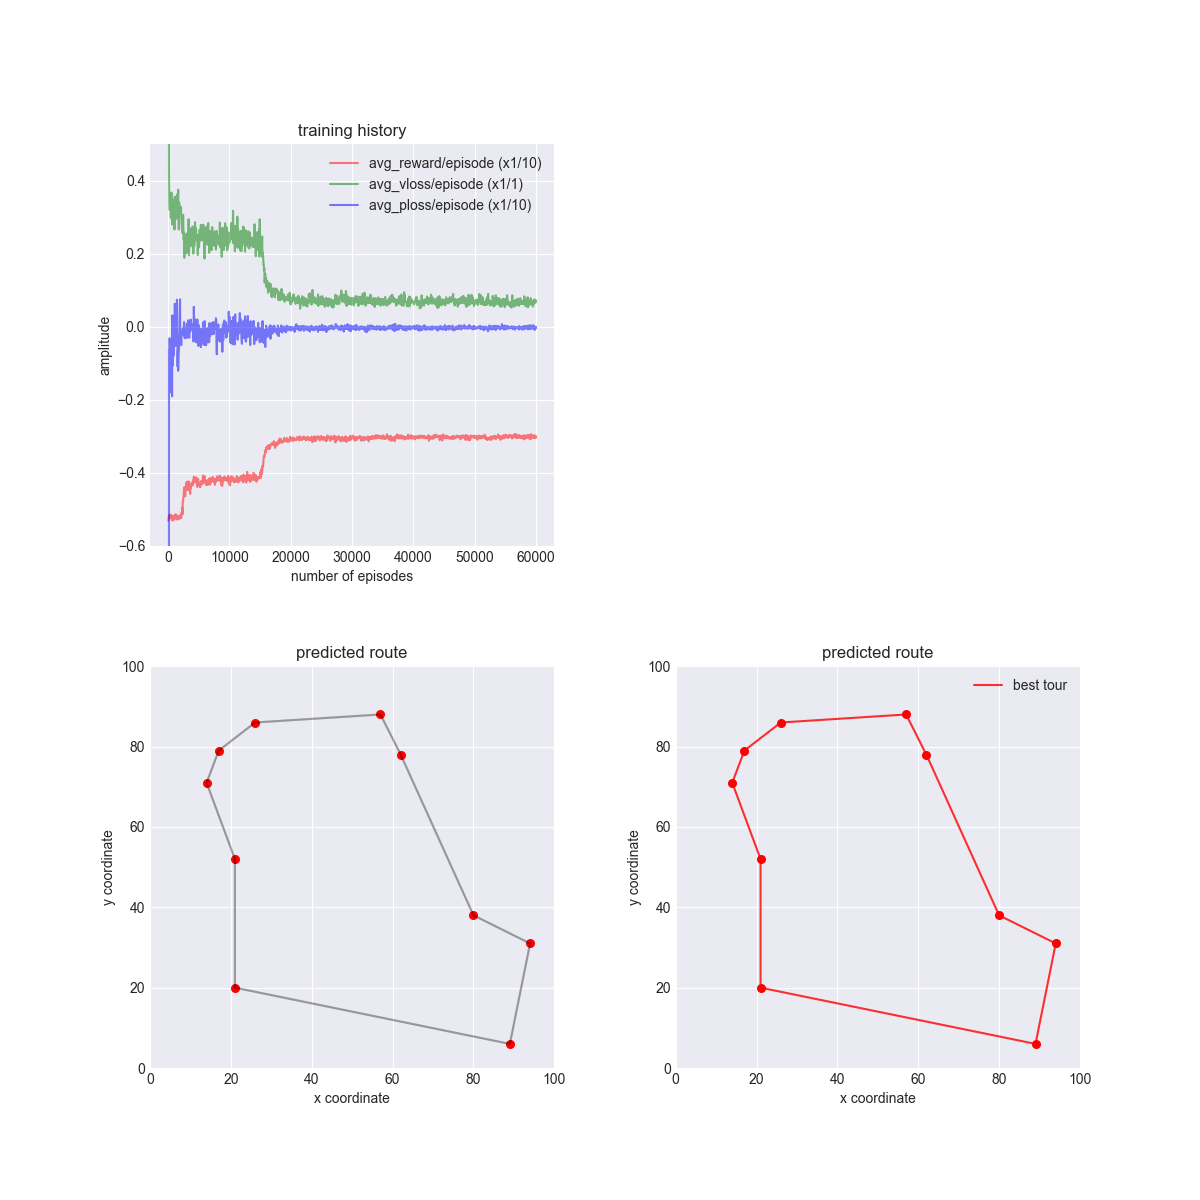

In [ ]:
from IPython.display import Image, display_png

# 画像の読み込み
png = './result_sample/plot.png'
# png = './result/plot.png'

# 画像の表示
display_png(Image(png, width=600))

### 6.3節　ルービックキューブ問題

In [ ]:
%cd /content/RL_Book_Colab/contents/6-3_rubiks_cube/

/content/RL_Book_Colab/contents/6-3_rubiks_cube


学習の実行（デフォルト設定は --n_episodes 150000 --n_steps 15）  
**※ result の下に学習結果（model.xxxx.ckpt.xxxx）を出力します。**

In [ ]:
!python3 train.py --n_episodes 5000 --n_steps 15

2024-12-07 08:29:44.137575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:29:44.137628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:29:44.138808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:29:45.150090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
/content/RL_Book_Colab/contents/6-3_rubiks_cube/gym_env/cube_algorithm.py:144: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cmd_char is '.':


学習結果を使った探索（デフォルト設定は --n_episodes 5000 --n_steps 15）  
**※ モデルの学習結果のパス（result/model.xxxx.ckpt）を指定します。**

In [ ]:
!python3 test.py --model_path result/model.004700-0.119-7.63548.ckpt --n_episodes 500 --n_steps 15

2024-12-07 08:32:36.023528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:32:36.023612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:32:36.025326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:32:37.220269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
2024-12-07 08:32:39.038095: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWT

探索結果の可視化（result/plot.png に出力）

In [ ]:
!python3 plot.py


### True Samples ###
Scrambles: 1,  46/ 46
 G | --[r]--> | S
 G | <--[.r]-- (-2.55) | S
Scrambles: 2,  51/ 51
 G | --[r]--> --[.f]--> | S
 G | <--[.r]-- (-2.55) <--[f]-- (-4.13) | S
Scrambles: 3,  58/ 58
 G | --[.f]--> --[f]--> --[.u]--> | S
 G | <--[u]-- (-1.31) | S
Scrambles: 4,  47/ 47
 G | --[u]--> --[.f]--> --[.f]--> --[r]--> | S
 G | <--[.u]-- (-2.18) <--[.f]-- (-2.54) <--[.f]-- (-5.18) <--[.r]-- (-6.56) | S
Scrambles: 5,  58/ 62
 G | --[.r]--> --[.r]--> --[.u]--> --[.u]--> --[f]--> | S
 G | <--[r]-- (-0.84) <--[r]-- (-2.41) <--[.u]-- (-4.71) <--[.u]-- (-5.73) <--[.f]-- (-5.36) | S
Scrambles: 6,  32/ 48
 G | --[r]--> --[.r]--> --[f]--> --[.r]--> --[.r]--> --[.r]--> | S
 G | <--[.f]-- (0.21) <--[.r]-- (-3.98) | S
Scrambles: 7,  37/ 45
 G | --[u]--> --[.u]--> --[u]--> --[f]--> --[u]--> --[r]--> --[.r]--> | S
 G | <--[.u]-- (-2.18) <--[.f]-- (-2.54) <--[.u]-- (-5.72) | S
Scrambles: 8,  17/ 54
 G | --[.r]--> --[u]--> --[f]--> --[f]--> --[.r]--> --[r]--> --[u]--> --[.u]--> | S
 G | <

学習の推移を表すグラフと、学習結果による探索性能のグラフを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの result_sample を result に書きかえて実行してください。**

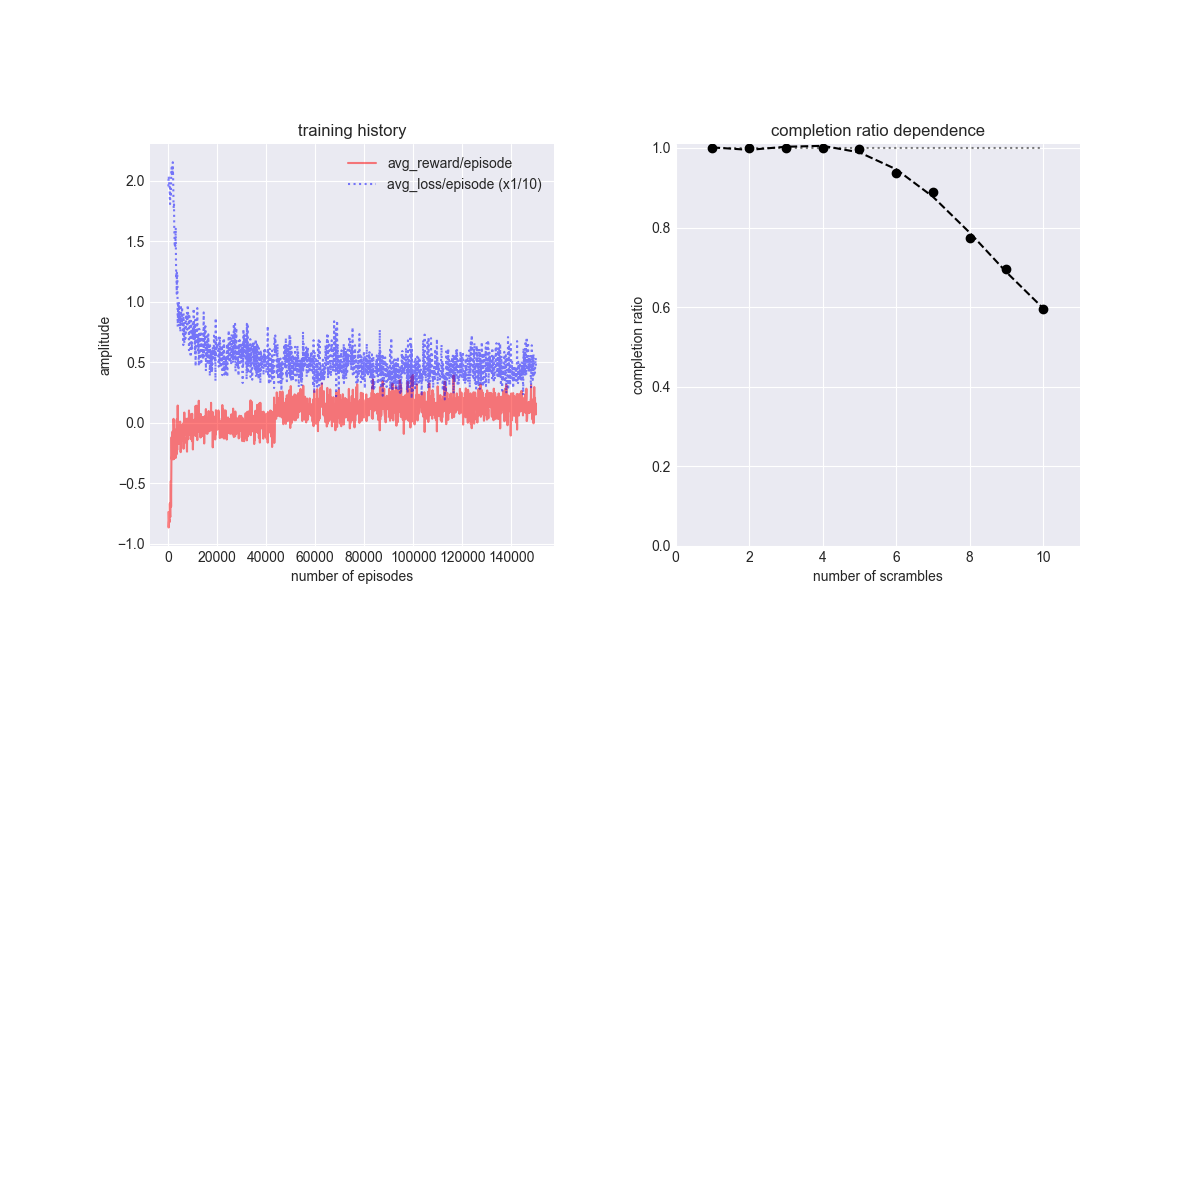

In [ ]:
from IPython.display import Image, display_png

# 画像の読み込み
png = './result_sample/plot.png'
# png = './result/plot.png'

# 画像の表示
display_png(Image(png, width=600))

### ※ここで、ドライブをマウントして、これまでの実行結果を保存します。  

**《 ドライブをマウントする手順 》**  

1.   直下のコマンドセルを実行してください。URLと入力欄が表示されます。

2.  そのURLをクリックしてください。アカウントへのアクセス許可を問うページが表示されます。

3.   そのページ下にある「許可」をクリックすると認証コードが表示されたページが開きます。

4.   認証コードをコピーしたら、それを手順1の入力欄に張り付けてEnterしてください。  
/content/drive の下に ’My Drive’ がマウントされます。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


'My Drive' の下にフォルダ Result_RL_Book_Colab を作って、そこに contents フォルダを丸ごとコピーします。  
**※保存する容量は、最低でも200MBほどになります。ご注意ください。**

In [ ]:
%cd /content/RL_Book_Colab/
%mkdir /content/drive/MyDrive/Result_RL_Book_Colab
%cp -rf contents /content/drive/MyDrive/Result_RL_Book_Colab/

/content/RL_Book_Colab


## 7章　系列データ生成への応用

### 7.1節　SeqGANによる文書生成

In [ ]:
%cd /content/RL_Book_Colab/contents/7-1_seqgan/

/content/RL_Book_Colab/contents/7-1_seqgan


SeqGANによる文書生成器の敵対的学習の実行（デフォルト設定は、g_episodes = 50, adversarial_nums = 10）  
**最新の学習結果により生成された文書は、data/generated_sentences.txt に出力されます。**  


サンプルコードでは、学習に使用するテキストファイルおよび学習パラメータを main.py において設定しています。短時間で動作確認できるよう学習用テキストとしてテキスト量の少ないものを指定し、学習回数も少なめに設定しています。書籍と同様の結果を再現したい場合は、以下の値に設定しなおして実行してください。

学習用テキストの指定（main.py 64,65行目）
```python
input_data = os.path.join('data', 'input.txt')  # input_mini.txt
id_input_data = os.path.join('data', 'id_input.txt')  # id_input_mini.txt
```

学習回数の設定（main.py 51,52,59,60行目）
```python
g_pre_episodes = 10  # generator pre_training epochs
d_pre_episodes = 4  # discriminator pre_training epochs

g_episodes = 50  # sentence num per generator update
n_sampling = 16  # number of monte carlo tree
```

In [ ]:
!python3 main.py

2024-12-07 08:49:43.451072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 08:49:43.451127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 08:49:43.452376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 08:49:44.455817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-07 08:49:46.369251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[<keras.src.engine.input_

SeqGANにより生成された文を表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの data/output_sample を data に書きかえて実行してください。**

In [ ]:
!sed -n 1,16p ./data/output_sample/generated_sentences.txt
# !sed -n 1,16p ./data/generated_sentences.txt

私 が 新しく 交際 の 間 に 物 を 解き ほどい て 断っ た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
玄関 から 違っ て 、 それ で は まだ 長く 話さ れる の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
そうして 封じる 晩 の 時刻 は 次第に 衰え た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
「 愉快 だっ た の で も 見え まし た よ 」 と 身体 を わざわざ わざわざ 見え て くれ た 銀杏 に は 、
Ｋ は 真宗 の 坊さん を 打つ の 一語 で 、 いつ 人間 を 極め た 複雑 な 意義 さえ 手 だ 。 </S> <PAD>
私 が 先生 に 、 奥さん に対する 書い て 私 を お嬢さん を 開け た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
私 は その 問題 を 与え た の と いい まし た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
奥さん に は 万事 を もっ て 見極めよ う と する と 、 決して 東京 の 一部 に 伴う 特別 な 蛇 の ごとく どう
もし 今 まで 経過 し て よかっ た 私 も あっ た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
大した 風 がち な 意味 で 拵え た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
私 も 、 「 両手 で 話 を 手 に 出そ う か 」 と いっ た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
少し でも お嬢さん 

SeqGANの出力結果をドライブにコピーします。

In [ ]:
%cp -rf data /content/drive/MyDrive/_08_書籍執筆/Result_RL_Book_Colab/contents/7-1_seqgan/

### 7.2節　ENASによるニューラルネットワークアーキテクチャ探索

In [ ]:
%cd /content/RL_Book_Colab/contents/7-2_enas/

/content/RL_Book_Colab/contents/7-2_enas


7-2節に限ってPillowのバージョンを 5.3.0 から 11.0.0 に切り替えます。

In [ ]:
!pip uninstall -y --quiet Pillow==5.3.0
!pip install --quiet Pillow==11.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 42.5 MB/s eta 0:00:00


この時点でインストールされているライブラリのバージョンをファイルに書き出しておきます。

In [ ]:
!pip list >> /content/RL_Book_Colab/lib_list_4.txt

以下のコマンドを実行して画像データをダウンロードします。

In [ ]:
!curl -O http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1907M  100 1907M    0     0  28.5M      0  0:01:06  0:01:06 --:--:-- 29.6M


画像データの tar ファイルを解凍して得られたフォルダ VOCdevkit を data と改名します。

In [ ]:
!tar -xvf VOCtrainval_11-May-2012.tar > /dev/null
%mv VOCdevkit data

エポック数を指定してENASを実行（結果は result/test と指定）、学習結果を自動でグラフ化します。  

ここでは、短時間で動作確認できるようエポック数を -num_epochs=3 に指定しています。書籍と同様の結果を再現したい場合は、エポック数を -num_epochs=200 に設定して実行してください。

In [ ]:
!python3 main.py -output_dir=./results/test -num_epochs=3 -image_dir=./data/VOC2012/JPEGImages/ -label_dir=./data/VOC2012/SegmentationClass/

2024-12-07 09:07:43.394788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 09:07:43.394852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 09:07:43.396252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 09:07:44.507861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
--------------------------------------------------------------------------------
Path ./results/test does not exist. Creating.
Logging to ./results/test/std

出力結果のテキスト (results/test/stdout.txt) があれば、学習を中断しても以下のコマンドを実行して学習結果をグラフ化できます。

In [ ]:
%mkdir test_visualize
%cp results/test/stdout.txt test_visualize/
!python3 utils.py -output_dir=./test_visualize

学習結果のプロットを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの results_sample を results に書きかえて実行してください。**

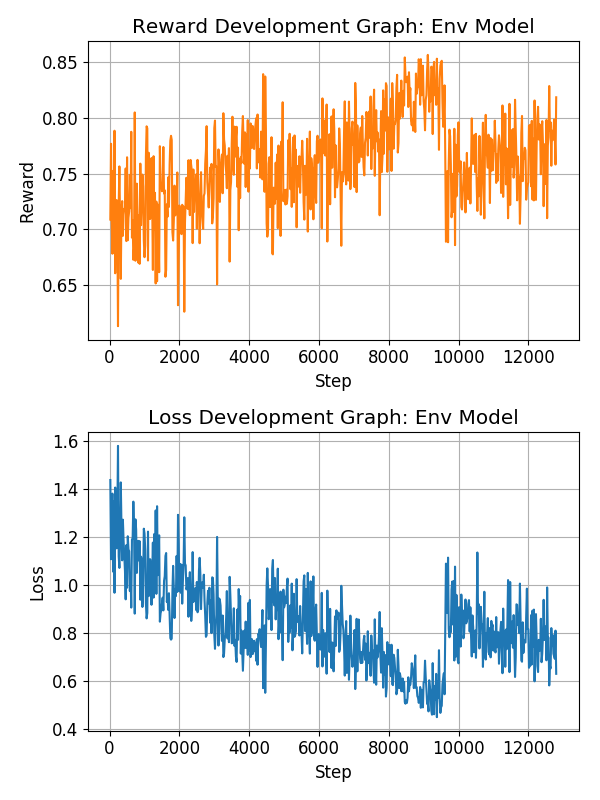

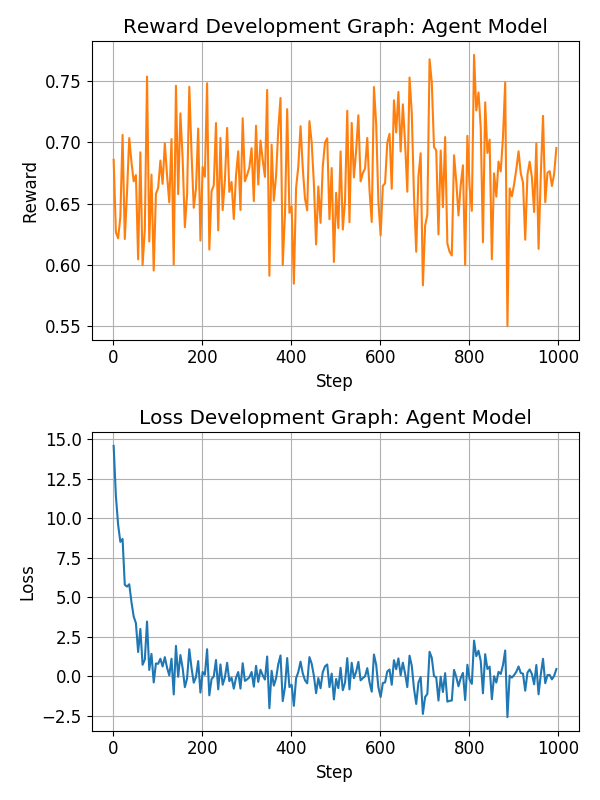

In [ ]:
from IPython.display import Image, display_png

# 画像の読み込み
png1 = './results_sample/test/output_fig/env_development.png'
png2 = './results_sample/test/output_fig/agent_development.png'
# png1 = './results/test/output_fig/env_development.png'
# png2 = './results/test/output_fig/agent_development.png'

# 画像の表示
display_png(Image(png1, width=400))
display_png(Image(png2, width=400))

ENASの学習結果および探索結果をドライブに保存します。  
**※保存する容量は、300MBほどになります。ご注意ください。**

In [ ]:
%cp -rf results /content/drive/MyDrive/Result_RL_Book_Colab/contents/7-2_enas

### 7.2節　ENAS探索結果の検証  
### ENAS探索で得られたベストアーキテクチャによるセマンティックセグメンテーション

#### 1．画像データの準備  
必要なライブラリをインポートします。

In [ ]:
import csv
import os
import random
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from keras.layers import (Input, Dense, Conv2D, SeparableConv2D,
                          AveragePooling2D, MaxPooling2D, UpSampling2D,
                          Activation, concatenate, Reshape)
from keras.layers import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
from keras.utils import plot_model
from keras import backend as K
from keras import metrics
import pandas as pd
from PIL import Image

画像データのパス、画像サイズ、クラス数を指定します。また、結果の出力先ディレクトリを指定します。

In [ ]:
data_path = "data/VOC2012"
image_size = (128, 128)
num_classes = 22
input_size = (128, 128, 3)

ニューラルネットワークの固定情報（フィルタ数、層数）およびENAS探索で得られたベストアーキテクチャを指定します。

In [ ]:
out_filters = 36
num_layers = 12
sample_arc = [0, 5, 5, 2, 2, 2, 4, 5, 3, 5, 3, 4]
save_root = "./output/20241207"

画像データを訓練用、検証用、テスト用に分けておきます。

In [ ]:
# Get the filenames of training image and label data
img_path = os.path.join(data_path + "/JPEGImages/")
lbl_path = os.path.join(data_path + "/SegmentationClass/")

# Only use names from lbl_path since not all images are labeled
lbl_filename_list = os.listdir(lbl_path)
lbl_filename_list.sort()
img_filename_list = [lbl_filename.replace(".png", ".jpg") for lbl_filename in lbl_filename_list]

# Parameters
height = image_size[0]
width = image_size[1]
category = num_classes

# 70% train, 20% validation, 10% test
num_images = len(img_filename_list)
num_train = int(num_images * 0.7)
num_valid = int(num_images * 0.2)
num_test = num_images - num_train - num_valid
train_img_filename_list = img_filename_list[0:num_train]
valid_img_filename_list = img_filename_list[num_train:num_train + num_valid]
test_img_filename_list = img_filename_list[num_images - num_test:num_images]
train_lbl_filename_list = lbl_filename_list[0:num_train]
valid_lbl_filename_list = lbl_filename_list[num_train:num_train + num_valid]
test_lbl_filename_list = lbl_filename_list[num_images - num_test:num_images]

batch_size = 16
train_steps_per_epoch = num_train // batch_size
valid_steps_per_epoch = num_valid // batch_size

# Open all test images and labels
test_images = np.zeros((len(test_img_filename_list), height, width, 3), dtype="float32")
test_labels = []
for index in range(len(test_img_filename_list)):
    test_img = Image.open(os.path.join(img_path, test_img_filename_list[index]))
    test_img = np.array(test_img)
    test_img = cv2.resize(test_img, (height, width))  # Resize
    test_img = test_img / 255.0   # Normalize
    test_images[index, :, :, :] = test_img

    test_lbl = Image.open(os.path.join(lbl_path, test_lbl_filename_list[index]))
    test_lbl = test_lbl.resize((height, width))
    test_lbl = np.asarray(test_lbl)
    test_labels.append(test_lbl)

test_labels = np.asarray(test_labels, dtype=np.uint8)

# Change indices which correspond to "void" from 255
test_labels = np.where(test_labels == 255, 21, test_labels)
np.set_printoptions(threshold=sys.maxsize)

# Convert to one hot encoding
identity = np.identity(category, dtype=np.uint8)
test_labels = identity[test_labels]

print("test_img.shape  = " + str(test_images.shape))
print("test_lbl.shape  = " + str(test_labels.shape))

test_img.shape  = (292, 128, 128, 3)
test_lbl.shape  = (292, 128, 128, 22)


#### 2．画像 Generator の準備  
訓練用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [ ]:
def train_input_generator():
    while 1:
        train_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        train_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_train))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            train_img = Image.open(os.path.join(img_path, train_img_filename_list[i]))
            train_img = np.array(train_img)
            train_img = cv2.resize(train_img, (height, width))  # Resize
            train_img = train_img / 255.0  # Normalize

            # Read training labels
            train_lbl = Image.open(os.path.join(lbl_path, train_lbl_filename_list[i]))
            train_lbl = train_lbl.resize((height, width))

            # Flip
            do_flip = random.choice([True, False])
            if do_flip:
                train_img = cv2.flip(train_img, 1)
                train_lbl = train_lbl.transpose(Image.FLIP_LEFT_RIGHT)

            # Random Crop
            do_random_crop = random.choice([True, False])
            if do_random_crop:
                x_start = random.randint(0, width/2)
                y_start = random.randint(0, height/2)
                train_img = train_img[y_start:y_start+int(height/2), x_start:x_start+int(width/2)]
                train_img = cv2.resize(train_img, (height, width))
                train_lbl = train_lbl.crop((x_start, y_start, x_start+int(width/2), y_start+int(height/2)))
                train_lbl = train_lbl.resize((height, width))

            train_lbl = np.asarray(train_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            train_images[batch_idx % batch_size] = train_img
            train_labels[batch_idx % batch_size] = train_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                train_labels_onehot = np.asarray(train_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                train_labels_onehot = np.where(train_labels_onehot == 255, 21, train_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                train_labels_onehot = identity[train_labels_onehot]

                yield (np.array(train_images), np.array(train_labels_onehot))

検証用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [ ]:
def validation_input_generator():
    while 1:
        valid_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        valid_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_valid))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            valid_img = Image.open(os.path.join(img_path, valid_img_filename_list[i]))
            valid_img = np.array(valid_img)
            valid_img = cv2.resize(valid_img, (height, width))  # Resize
            valid_img = valid_img / 255.0  # Normalize

            # Read training labels
            valid_lbl = Image.open(os.path.join(lbl_path, valid_lbl_filename_list[i]))
            valid_lbl = valid_lbl.resize((height, width))

            valid_lbl = np.asarray(valid_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            valid_images[batch_idx % batch_size] = valid_img
            valid_labels[batch_idx % batch_size] = valid_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                valid_labels_onehot = np.asarray(valid_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                valid_labels_onehot = np.where(valid_labels_onehot == 255, 21, valid_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                valid_labels_onehot = identity[valid_labels_onehot]

                yield (np.array(valid_images), np.array(valid_labels_onehot))

#### 3．ENAS探索結果による深層ネットワーク（ENAS-Net）の構築  
ENAS探索のベストアーキテクチャを読み込んで、深層ネットワークを構築します。

In [ ]:
def enas_facory(
        input_size,
        out_filters,
        num_layers,
        sample_arc,
        num_classes=22):

    pool_distance = num_layers // 4
    pool_layers = [pool_distance - 1, 2 * pool_distance - 1, 3 * pool_distance - 1]


    def conv_branch(x, kernel_size=(3, 3), separable=False, dilation_rate=2, out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if separable == False:
            x = Conv2D(out_filters, kernel_size, dilation_rate=dilation_rate, padding='same')(x)
        else:
            x = SeparableConv2D(out_filters, kernel_size, strides=(1, 1), padding='same',
                                depth_multiplier=1, use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        return x


    def pool_branch(x, avg_or_max='max', out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if avg_or_max == 'avg':
            x = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
        elif avg_or_max == 'max':
            x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        else:
            raise ValueError("Unknown pool {}".format(avg_or_max))
        return x


    def enas_layer(x, out_filters):
        enas_layers = []
        enas_layers.append(conv_branch(x, (3, 3), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (3, 3), separable=True, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=True, out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'avg', out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'max', out_filters=out_filters))
        return enas_layers


    # Input placeholder
    def build_input_layer(input_size):
        return Input(shape=input_size, name='input')

    # Encoder layers
    layers = []


    def build_encoding_layers(x):
        # Stem convolution
        x = Conv2D(out_filters, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        # Encoder layers
        for layer_id in range(num_layers):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
            layers.append(x)
        return x


    # Decoder layers with long skip connections
    def build_decoding_layers(x):
        # Decorder layers
        for layer_id in reversed(range(num_layers)):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = UpSampling2D(size=(2, 2))(x)
                x = concatenate([x,layers[layer_id - 1]], axis=3)
                x = Conv2D(out_filters, (1, 1), padding='same')(x)
            layers.append(x)

        # end convolution
        x = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(x)
        x = Reshape((input_size[0], input_size[1], num_classes), name='conv-output-reshape')(x)
        return x

    # 入力と出力を指定してモデルを作成
    input_img = build_input_layer(input_size)
    encoded = build_encoding_layers(input_img)
    decoded = build_decoding_layers(encoded)
    model = Model(inputs=input_img, outputs=decoded)

    # 損失関数、最適化手法、監視メトリクスの設定
    model.compile(
        optimizer='adam',
        #loss='mean_squared_error',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

モデル構築とサマリーの書き出し

In [ ]:
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)
enas_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 36)         1008      ['input[0][0]']               
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 36)         144       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 36)         1332      ['batch_normalization[0][0

#### 4．ENAS-Net の学習  
callback 関数の定義

In [ ]:
def get_callbacks(save_root):
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    tensorboard_dir = os.path.join(save_root, 'tensorboard')
    # checkpoint_path = os.path.join(save_root, 'weights.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5')
    checkpoint_path = os.path.join(save_root, 'weights.{epoch:02d}-{val_loss:.4f}-{val_accuracy:.4f}.hdf5')
    csv_path = os.path.join(save_root, 'log.csv')

    # TensorBoard
    tensorboard = TensorBoard(log_dir=tensorboard_dir)

    # エポックごとの自動セーブ
    model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1)

    # Save best model
    best_model = ModelCheckpoint(os.path.join(save_root,'best_model_weights.hdf5'),
                                 monitor='val_loss', verbose=1, save_best_only=True)

    # csv結果出力
    csv_logger = CSVLogger(filename=csv_path)

    callbacks = [tensorboard, model_checkpoint, csv_logger, best_model]

    return callbacks

ENAS探索で得られたベストアーキテクチャの深層ネットワークを学習します。

In [ ]:
# callback関数の生成
callbacks = get_callbacks(save_root)

# モデル構築
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)

# 学習回数（エポック数）を指定（1000回以上が望ましいが、試すだけなら100回で十分）
num_epoch = 10

# 学習の実行
# enas_unet.fit_generator(generator=train_input_generator(), steps_per_epoch=train_steps_per_epoch,
#                         epochs=num_epoch, validation_data=validation_input_generator(),
#                         validation_steps=valid_steps_per_epoch, callbacks=callbacks)
enas_unet.fit(x=train_input_generator(), steps_per_epoch=train_steps_per_epoch,
                        epochs=num_epoch, validation_data=validation_input_generator(),
                        validation_steps=valid_steps_per_epoch, callbacks=callbacks)

Epoch 1/10
127/127 [==============================] - ETA: 0s - loss: 1.9184 - accuracy: 0.5935
Epoch 1: saving model to ./output/20241207/weights.01-1.6541-0.6620.hdf5

Epoch 1: val_loss improved from inf to 1.65413, saving model to ./output/20241207/best_model_weights.hdf5
127/127 [==============================] - 51s 181ms/step - loss: 1.9184 - accuracy: 0.5935 - val_loss: 1.6541 - val_accuracy: 0.6620
Epoch 2/10
127/127 [==============================] - ETA: 0s - loss: 1.5755 - accuracy: 0.6405
Epoch 2: saving model to ./output/20241207/weights.02-1.5456-0.6613.hdf5

Epoch 2: val_loss improved from 1.65413 to 1.54562, saving model to ./output/20241207/best_model_weights.hdf5
127/127 [==============================] - 22s 173ms/step - loss: 1.5755 - accuracy: 0.6405 - val_loss: 1.5456 - val_accuracy: 0.6613
Epoch 3/10
127/127 [==============================] - ETA: 0s - loss: 1.5420 - accuracy: 0.6415
Epoch 3: saving model to ./output/20241207/weights.03-1.5209-0.6594.hdf5

Epoch 

#### 5．学習済み ENAS-Net によるセマンティックセグメンテーション  
学習済みネットワークによるセマンティックセグメンテーションのテストに必要な関数を定義します。

In [ ]:
##########
# セマンティックセグメンテーションの実施と可視化のための関数
##########
def plot_test(model, test_img, test_lbl):
    X = test_img
    Y = test_lbl
    num_classes = Y.shape[-1]
    predicted = model.predict(X)

    max_class = np.argmax(predicted[0], axis=-1)
    y_true = np.argmax(Y[0], axis=-1)

    conj_mat = np.zeros((num_classes, num_classes))
    for x in range(X.shape[1]):
        for y in range(X.shape[2]):
            conj_mat[y_true[x,y], max_class[x,y]] += 1

    # Original image
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.imshow(X[0])
    ax.set_title('org image')
    ax.set_axis_off()

    # Ground truth
    ax = fig.add_subplot(132)
    ax.imshow(y_true)
    ax.set_title('ground truth')
    ax.set_axis_off()

    # Predicted image
    ax = fig.add_subplot(133)
    ax.imshow(max_class)
    ax.set_title('predicted')
    ax.set_axis_off()

    return conj_mat

##########
# セマンティックセグメンテーション実施結果の性能指標を計算する関数
##########
def calc_metrics(conj_mat):
    num_truth = np.sum(conj_mat, axis=1)
    num_predict = np.sum(conj_mat, axis=0)

    R_met = []
    P_met = []
    F_met = []
    IOU = []
    A_met = 0

    for cat in range(conj_mat.shape[0]):
        if num_predict[cat] != 0:
            p = conj_mat[cat,cat]/num_predict[cat]
        else:
            p = 0
        if num_truth[cat] != 0:
            r = conj_mat[cat,cat]/num_truth[cat]
        else:
            r = 0
        A_met += conj_mat[cat,cat]
        if p + r != 0:
            f = 2*p*r/(p+r)
        else:
            f = 0
        P_met.append(p)
        R_met.append(r)
        F_met.append(f)
        IOU.append(f/(2-f))

    A_met /= np.sum(num_truth)
    mean_IOU = sum(IOU)/len(IOU)

    print("Accuracy: " + str(np.round(A_met*10000,0)/100))
    print("mean_IOU: " + str(np.round(mean_IOU*10000,0)/100))
    print("avg_Precision: " + str(np.round(10000*np.mean(P_met),0)/100))
    print("avg_Recall: " + str(np.round(10000*np.mean(R_met),0)/100))
    print("avg_F-measure: " + str(np.round(10000*np.mean(F_met),0)/100))
    print("Precision: " + str([np.round(p * 10000,0)/100 for i, p in enumerate(P_met)]))
    print("Recall: " + str([np.round(r * 10000,0)/100 for i, r in enumerate(R_met)]))
    print("F-measure: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(F_met)]))
    print("IOU: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(IOU)]))

学習結果の読み込み

In [ ]:
# Load the best model
enas_unet.load_weights(os.path.join(save_root, "best_model_weights.hdf5"))

ベストアーキテクチャの深層ネットワーク（学習済み）を用いたセマンティックセグメンテーションのテストを実施します。  
**※次のセルの実行結果には、VOC2012の画像が表示されます。著作権の都合上、この配布用サンプルからは出力結果を削除しました。**

In [ ]:
import matplotlib as mpl

mpl.rcParams['figure.max_open_warning'] = 50  # 上限を50に変更

conj_mat = np.zeros((num_classes, num_classes))

for i in range(100, 130):#len(test_images)):
    image = np.array([test_images[i]])
    label = np.array([test_labels[i]])
    conj_mat += plot_test(enas_unet, image, label)

テスト結果のファイル出力

In [ ]:
result = pd.DataFrame(conj_mat)
result.to_csv(os.path.join(save_root, 'result_renew.csv'))

性能指標の表示  
**※以下の出力のうち、Precision, Recall, F-measureは、22クラスごとの数値が以下の順に並んでいます。**  

id	物体クラス  
0	background  
1	aeroplane  
2	bicycle  
3	bird  
4	boad  
5	bottle  
6	bus  
7	car  
8	cat  
9	chair  
10	cow  
11	dining table  
12	dog  
13	horse  
14	motor bike  
15	person  
16	potted plant  
17	sheep  
18	sofa  
19	train  
20	tv/monitor  
21	(void)**

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

calc_metrics(conj_mat)

Accuracy: 69.54
mean_IOU: 3.65
avg_Precision: 5.59
avg_Recall: 5.08
avg_F-measure: 4.58
Precision: [71.19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.97, 0.0, 0.0, 0.0, 0.0, 0.0, 25.82]
Recall: [98.29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37]
F-measure: [82.57, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.38, 0.0, 0.0, 0.0, 0.0, 0.0, 0.74]
IOU: [70.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.52, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37]


ENAS-Netの学習結果およびセマンティックセグメンテーション実施結果をドライブに保存します。  
**※保存する容量は、400MBほどになります。ご注意ください。**

In [ ]:
%cp -rf output /content/drive/MyDrive/Result_RL_Book_Colab/contents/7-2_enas